# Principal Data Analyst Technical Test

## Overview
* This Jupyter notebook contains all my responses to the technical test. 
* My responses to each question has been collated at the very top for conveinence.
* The rest of the workbook will outline the detailed steps used to derive the answers above.

## Collated answer to each question. 

### Question 1
> Identify and describe 2 data quality issues present in the dataset.

#### Response

Using the data dictionary that I created below, I have identified two potential sources of data quality issues:

1. **Missing values** - some fields contain missing values including: `BundledCharges` (17,106 missing values), `CCU_Charges` (17,167 missing values), `ICU_Charge` (17,138 missing values), `OtherCharges` (17,181 missing values), `HoursMechVentilation` (28,457 missing values), `InfantWeight` (28,475 missing values) and `PharmacyCharge` (16,735 missing values)
2. **Sparse categorical variables**: some categorical fields have too many unique values for the number of rows in the data (30,000), specifically `PrincipalDiagnosis` (17,824 unique values) and `Principal_ProcedureCode` (27,624 unique values) as well as the other secondary and tertiary diagnosis and procedure code fields. This level of sparsity could become an issue when used in machine learning models to generate reliable predictions or analyses.

> Briefly propose strategies to address these issues. Document the steps taken and provide a summary of the data quality improvements.

#### Response

1. **Missing values**
   * The first step is to assess the nature of the missing data to determine whether the missing values are random or follow a specific pattern. For instance, if a patient underwent a procedure that did not require the use of an operating theatre, it would be expected that there are no costs associated with `TheatreCharge`. Identifying such patterns helps guide the appropriate handling of missing data, ensuring that it is treated in a way that reflects the underlying context of the dataset.
   * Next, imputing the missing values is necessary. For example, for cost-related variables like `BundledCharges`, `CCU_Charges`, and `ICU_Charge`, it may be reasonable to assume that missing values represent a zero cost, particularly if the missingness is due to costs not being incurred. However, for other numerical fields, it might be more appropriate to impute missing values using the mean or median, depending on the data’s distribution. For categorical variables, assigning a separate "Unknown" category ensures that the information is retained for further analysis and modeling.
   * If there are significant issues with missing values and the observations cannot be reliably imputed, it may be worth considering dropping the rows from the dataset. However, this approach should be applied cautiously as it could introduce bias or reduce the robustness of the analysis.

2. **Sparse categorical variables**: 
   * It is important to first verify whether having thousands of unique `PrincipalDiagnosis` or `Principal_ProcedureCode` values is reliable and valid. These fields can be manually reviewed to check for any potential issues, such as data entry inconsistencies caused by variations in spelling or capitalisation. If such issues are identified, automated methods can be employed to fix the inconsistencies, such as using string similarity metrics like Levenshtein distance.
   * If the data is found to be too granular, which may reduce its usefulness for analysis, the next step would be to group these codes into broader, more meaningful categories that simplify the dataset without losing critical diagnostic or procedural information. This process would improve data interpretability and reduce the dimensionality of the data, especially when considering methods like one-hot encoding. One-hot encoding could otherwise generate thousands of additional features, leading to computational inefficiencies and challenges with model interpretability, as the model might struggle to capture meaningful patterns and instead introduce noise.
   * If further dimensionality reduction is necessary, rare categories can be binned into an "Other" group, while retaining only the most common diagnoses or procedure codes. This technique helps reduce complexity and focuses the analysis on the most frequent and important categories.

### Question 2

>Using the data provided create a feature that could be valuable for analysis or modelling.

#### Response

* `LengthOfStay = SeparationDate - AdmissionDate`

>Explain the rationale behind the features you created and how they might be useful for analysis.

#### Response
* Length of stay is the time a patient spends in the hospital, mostly useful for the admitted care type.
* It is a useful indicator of hospital efficiency and patient recovery, where there might be opportunities to optimise the length of stay to improve resource allocation, reduce cost and improve patient outcomes.
* For example, prolonged stays may indicate complications while very short stays might be associated with premature discharge.
* From a modelling perspective, you could use the length of stay feature as a:
  * **target variable** - where you could predict the length of stay based on patient characteristics, medical conditions, medical services provided, etc. Understanding features that would affect length of stay can help improve hospital throughput and ensure resources are effectively managed, including bed and staff allocation; and
  * **explanatory variable** - where you could use this feature as an independent variable to predict risk with patient readmission, patient health outcome, cost of care, etc. For example, with patient readmission, the length of stay feature would be particularly useful to identify potential at-risk patients who may need additional follow-up care or early intervention to prevent potential hospital readmission. 


### Question 3

> Using the data provided produce a piece of analysis that describes to Ramsay which DRGs accrue the largest charges and your hypotheses for the drivers of these charges.

> Visualise these trends using appropriate charts or graphs and describe the results.

#### Response

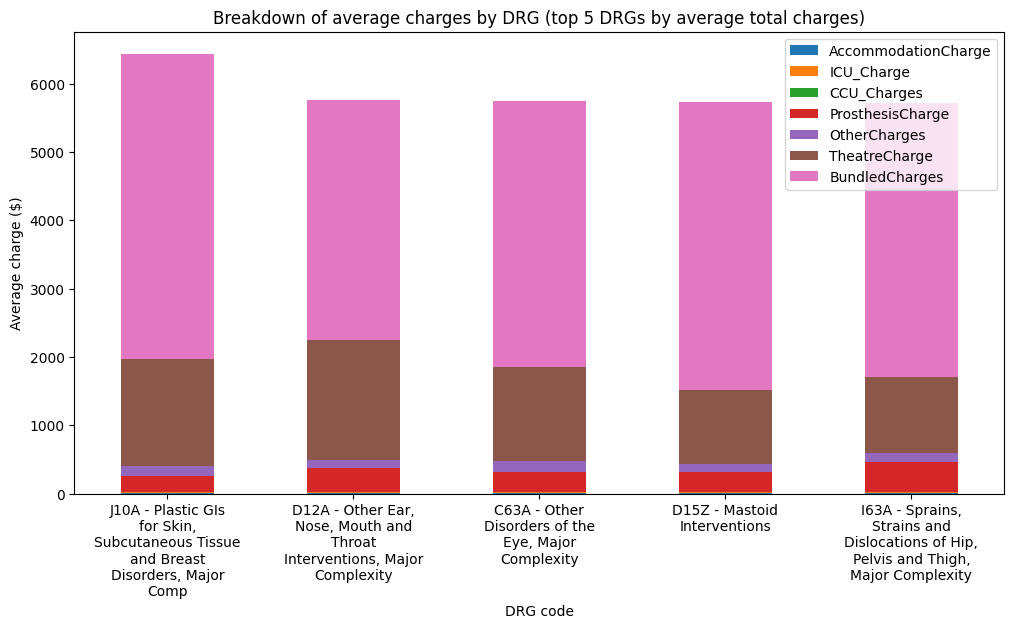

The top 5 DRGs (based on the descriptions) based on total average charges are:

1. **J10A** - Plastic Grafts for Skin, Subcutaneous Tissue, and Breast Disorders, Major Complexity
2. **D12A** - Other Ear, Nose, Mouth, and Throat Interventions, Major Complexity
3. **C63A** - Other Disorders of the Eye, Major Complexity
4. **D15Z** - Mastoid Interventions
5. **I63A** - Sprains, Strains, and Dislocations of Hip, Pelvis, and Thigh, Major Complexity

The total average charges for these DRGs range between $5000 to $7000, primarily driven by bundled payments, theatre charges, and prosthesis costs. This indicates that for more complex care involving bundled payment arrangements, surgical procedures and prosthetic interventions are the key cost drivers. The cost distribution is consistent across the top five DRGs, with bundled charges representing the largest portion (average 67.97% contribution across the top 5 DRGs), followed by theatre (23.41%) and prosthesis charges (5.49%), and then other associated costs (2.25%). The other remaining charges, accommodation (0.19%), ICU (0.17%) and CCU (0.14%) are negligible to the total average cost.

These results align with expectations, as it is reasonable to hypothesise that DRGs classified as high complexity typically require significant operating theatre time, prosthetic devices, and bundled services (which may include post-operative care, rehabilitation, and other ancillary services that can be assumed are not categorised under other charges).

Despite the dominance of bundled charges, theatre charges remain substantial, particularly in DRGs that involve surgical interventions such as plastic skin grafts (**J10A**), ENT procedures (**D12A**), eye disorders (**C63A**), mastoid surgeries (**D15Z**), and major sprains, strains, and dislocations (**I63A**). These DRGs often involve extended operating room times, followed by comprehensive post-operative care and rehabilitation, which likely accounts for the high bundled costs observed.

### Question 4

> Write an SQL query to calculate the total and average admissions for each month over the last two years. Include the month and year in the results.

*Response*:

The query below returns:
* The total admissions for each month (`total_admission`) and average number of admissions across all months (`average_monthly_admission`) for each month and year over the last two years.

### Question 5 

> Write an SQL query to analyse the distribution of `TotalCharges` by `PrincipalDiagnosis` and `Sex`. Use percentiles to describe the distribution.

#### Response

Based on the dataset and the observed output below, grouping by `PrincipalDiagnosis` and `Sex` to analyse the distribution of `TotalCharges` using percentiles shows that the overall data is sparse. Specifically, there are 22,840 rows in the output, but over 17,824 unique `PrincipalDiagnosis` codes, which suggests that the combinations of `PrincipalDiagnosis` and `Sex` are too granular to provide meaningful insights or percentile ranking (i.e. most of the percentile will shows up as 1 given there's only one single observation as shown in the `n_diagnoses` column of the output).

Given this issue and the nature of how `PrincipalDiagnosis` codes are structured, it would be more effective to aggregate these codes into broader and more meaningful groups. For example, grouping similar diagnoses based on disease categories, body systems or potential treatment types to help address the issue of small sizes within each group. In the ICD-10-CM coding system, the highest level listing or classification would be to aggregate the codes by the 22 Chapters which is bsaed on the body system or condition (e.g. diagnoses related to Neoplasms (C00-D49), Diseases of the Respiratory System (J00-J99)). This higher-level grouping would provide sufficient data to assess the variability in `TotalCharges` across broader diagnostic categories.


### Question 6

> Based on your analysis, identify two strategic insights that could help Ramsay improve hospital operations or patient care. Justify your insights with evidence from your data analysis.

#### Response

**Hospital operations**

Given that bundled charges contribute an average of 67.97% to the total costs across the top 5 DRGs, it is apparent that bundled payments are the dominant cost driver for these complex care episodes. The fact that bundled charges contribute over two-thirds of total average costs across these DRGs:
 
1. **J10A** - Plastic Grafts for Skin, Subcutaneous Tissue, and Breast Disorders, Major Complexity
2. **D12A** - Other Ear, Nose, Mouth, and Throat Interventions, Major Complexity
3. **C63A** - Other Disorders of the Eye, Major Complexity
4. **D15Z** - Mastoid Interventions
5. **I63A** - Sprains, Strains, and Dislocations of Hip, Pelvis, and Thigh, Major Complexity

suggest that they include a significant portion of the treatment costs associated with the complex nature of these DRGs, including pre-operative services, post-operative care and rehabilitation. As there is currently a lack of transparency within the data, it would be beneficial for Ramsay to further gather data-driven insights into what is driving the bundled charges to potentially identify areas of cost savings while maintaining the quality of care. For example,it is currently unclear whether rehabilitation services, follow-up consultations or post-surgical complications contribute significantly to the bundled cost for DRGs like I63A (Sprains, Strains, and Dislocations). It is likely that there is a general bundling framework in place that applies a one-size-fits-all approach to covering a wide range of essential services. This presents an opportunity to enhance transparency by identifying the specific aspects of care that are driving the highest cost. By enhancing visibility into these cost drivers, it would enable Ramsay to develop targeted strategies aimed at improving both financial performance and patient health outcomes. Specifically, personalising the bundled payment model to reflect the unique needs of different patient groups or procedures could result in more efficient resource allocation and better overall care.


**Patient care**

Given the granularity of the `PrincipalDiagnosis` codes, it would be beneficial for Ramsay to aggregate these codes into broader diagnostic categories, such as the 22 ICD-10 Chapters, while still utilising the granular codes to enhance patient care. When exploring strategic opportunities to improve patient outcomes, such as developing personalised care pathways, Ramsay could create standardised care protocols for specific diagnostic groups based on higher-order groupings like the 22 ICD-10 Chapters or intermediate levels of aggregation, particularly for diagnostic groups that are either prevalent or complex. For example, in the case of neoplastic diseases (Chapter 2 - Neoplasms (C00-D49)), a standardised care pathway could enable a multi-disciplinary delivery of care approach, covering oncologists, radiologists and other provider specialities to support the patient through the care episode. Similarly, using broader diagnostic groups could also help identify potential patients at risk for particular diseases. For instance, when focusing on patients related to the circulatory system (Chapter 9 -  Diseases of the Circulatory System (I00-I99)), Ramsay could leverage this aggregated diagnostic categories data to design preventative programs aimed at early detection, such as including lifestyle intervention, preventative care and strategies to reduce the need for acute interventions, ultimately improving patient outcomes.

### Question 7

> Describe a predictive model that could help Ramsay act upon one of the insights you found in Part 4. Describe your model purpose, model choice, preprocessing steps, and evaluation metrics.

#### Response

**Hospital operations - drivers of bundled charges**

* **Model purpose**: Identify the key factors driving bundled charges within the dataset, particularly across complex DRGs
* **Model choice**:  For this model purpose, a GLM can be used as it carries the key benefit of interpretability, making it easier to quantify and understand the relationship between bundled charges and the predictors in the model.
* **Model design**:
  * Response variable: `BundledCharges`
  * Predictor variables:
    * Patient demographics including `Age`, `Gender`, `Sex`, `length of stay` (see Q2)
    * Episode information, including `AR-DRG`, `UrgencyofAdmission` and `procedure complexity` from `DRGDescription` (see Q1)
    * Charges, including `AccommdationCharge`, `ICU_Charge`, `CCU_Charges`, `TheatreCharge`, `ProsthesisCharge` and `OtherCharges`.  

* **Pre-processing steps**
  * Handle missing data and outliers. - see Q1. 
  * Encode categorical variables - for example, one-hot encode `Gender`, `Urgency of Admission`, `AR-DRG` - while there are more than 800 DRGs in the data. It would be ideal to narrow down the DRGs to a subset that has high complexity as that would be more relevant to predict `BundledCharges`.
  * Standardise numerical features - for example, could min-max scale the predictor charges to ensure the features are on a comparable scale.
  * Assess distributions and apply transformation where needed - for example, apply log transformation to ThreatreCharge 
  * Feature engineering - create interaction terms between key variables. For example, it may be worthwhile to create an interaction term between `ThreatreCharge` and `ProsthesisCharge` given they are most likely jointly impacted in complex procedures.
  * Train test split the data - use 70% for training and hold out 15% for testing and another 15% for validation. 
  * Assess the quality of the features - for example, check for multicollinearity between the predictor variables. For example, if certain charges like `AccommdationCharge` and `ICU_Charge` are highly collinear, it might be worth combining them into a single feature.

* **Model evaluation**: Evaluate the performance of the GLM by assessing how well the model's predictions match against the actual `BundledCharges`. This could be done using:
  * Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) to get prediction errors
  * R-squared (R2) to explain how much variability in the data is captured by the model
  * Akaike Information Criteria (AIC) to compare between models and assess goodness of it while balancing with model complexity.


### Question 8

> Describe how you would deploy the trained model into a production environment. Discuss how you would monitor its performance and handle any potential issues.


#### Response

At a high level, the following strategies will help ensure that the deployed model will perform consistently, handle issues proactively and adapt to real-time production challenges.

* **Model drift**
  * Over time, the trained model may experience drift, where the data distribution in production diverges from the data used during model training. This is particularly common as new data is continuously collected. Model drift can also lead to unintended biases, such as imbalances in data that may introduce bias against certain groups.
  * To mitigate the risk of drift, the model should be regularly retrained with new incoming data to ensure it remains up-to-date with emerging trends and patterns.
  * Continuous monitoring of this risk can be achieved using evaluation metrics such as MAE, RMSE and R2 in production. These metrics can track any significant deviation from an established baseline. For instance, a monitoring dashboard could be developed with automated alerts that trigger when potential drift is detected, such as when the MAE exceeds a certain percentage increase over the baseline.

* **Data quality monitoring**
  * Changes in the quality of incoming data can negatively affect model performance, causing issues such as missing values, inconsistent formats, or the presence of outliers that were not accounted for in the training data.
  * To address these risks, automated data quality checks can be implemented. These may include imputing missing values, setting up alerts for unexpected values (e.g., flagging cases where length of stay is negative), and ensuring that the format and structure of incoming data remain consistent with the training data.
  * Similar to the above, a data quality monitoring dashboard could be used to quickly report and handle any data anomalies, ensuring that issues are addressed promptly and the integrity of the data is maintained.

* **Scalability and latency**
  * Deploying and scoring the model in production, particularly in real-time, can lead to performance bottlenecks, potentially increasing operational costs.
  * To prevent these challenges, load testing should be conducted to ensure that the model can scale efficiently with increasing volume of data. If performance bottlenecks occur, improvements could include model pruning (reducing feature complexity) or optimising hardware by leveraging GPU or TPU acceleration, commonly available through cloud providers. These hardware accelerations can significantly improve throughput and reduce latency, ensuring that the model meets real-time performance demands if required.

**The remainder of the workbook will outline the detailed steps used to derive the answers above**

## Setup and load data

In [44]:
# Load packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap
import pandasql as psql

# helper functions
from src.help_functions import wrap_labels


In [45]:
# Load data
data = pd.read_excel('data/Data Insights - Synthetic Dataset.xlsx')

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   insurer_id               30000 non-null  object        
 1   episode_id               30000 non-null  int64         
 2   DateOfBirth              30000 non-null  datetime64[ns]
 3   Postcode                 30000 non-null  int64         
 4   Sex                      30000 non-null  object        
 5   AdmissionDate            30000 non-null  datetime64[ns]
 6   SeparationDate           30000 non-null  datetime64[ns]
 7   AR-DRG                   30000 non-null  object        
 8   ModeOfSeparation         30000 non-null  object        
 9   CareType                 30000 non-null  object        
 10  SourceOfReferral         30000 non-null  object        
 11  DischargeIntention       30000 non-null  object        
 12  AdmissionProviderID      30000 n

Get DRG descriptions from online - Downloaded v10.0 AR-DRG list from https://www.aihw.gov.au/reports/hospitals/ar-drg-data-cubes/contents/summary to extract the DRG description.


In [47]:
# read the second sheet in and skip the first 4 rows to read in just the table.

AIHW_DRGs = pd.read_excel('data\AIHW-Web-216-Australian-Refined-Diagnosis-Related-Group-cube-2022-23.xlsx', sheet_name=1, skiprows=4)

AIHW_DRGs['AR-DRG'] = AIHW_DRGs['DRG V10.0'].str[:4] # get the first 4 characters of the DRG V10.0 column to get the DRG code.
AIHW_DRGs['DRGDescription'] = AIHW_DRGs['DRG V10.0'].str[5:] # keep the rest for the description

DRG_descriptions = AIHW_DRGs[['AR-DRG', 'DRGDescription']] # create separate dataframe to join on later.

DRG_descriptions = DRG_descriptions.drop_duplicates() # remove duplicate entries to keep DRG and descriptions

print(DRG_descriptions) # 791 AR-DRGs

# join onto data

data = pd.merge(data, DRG_descriptions, on='AR-DRG', how='left')

      AR-DRG                                     DRGDescription
0       A13A         Ventilation >= 336 hours, Major Complexity
38      A13B         Ventilation >= 336 hours, Minor Complexity
75      A14A  Ventilation >= 96 hours & < 336 hours, Major C...
113     A14B  Ventilation >= 96 hours & < 336 hours, Interme...
152     A14C  Ventilation >= 96 hours & < 336 hours, Minor C...
...      ...                                                ...
43734   Z65Z  Congenital Anomalies and Problems Arising from...
43776   Z66Z                                    Sleep Disorders
43854   801A  GIs Unrelated to Principal Diagnosis, Major Co...
43903   801B  GIs Unrelated to Principal Diagnosis, Intermed...
43979   801C  GIs Unrelated to Principal Diagnosis, Minor Co...

[791 rows x 2 columns]


## Part 1: Data Exploration and Preparation

### Question 1
> Identify and describe 2 data quality issues present in the dataset.

#### Response

Using the data dictionary that I created below, I have identified two potential sources of data quality issues:

1. **Missing values** - some fields contain missing values including: `BundledCharges` (17,106 missing values), `CCU_Charges` (17,167 missing values), `ICU_Charge` (17,138 missing values), `OtherCharges` (17,181 missing values), `HoursMechVentilation` (28,457 missing values), `InfantWeight` (28,475 missing values) and `PharmacyCharge` (16,735 missing values)
2. **Sparse categorical variables**: some categorical fields have too many unique values for the number of rows in the data (30,000), specifically `PrincipalDiagnosis` (17,824 unique values) and `Principal_ProcedureCode` (27,624 unique values) as well as the other secondary and tertiary diagnosis and procedure code fields. This level of sparsity could become an issue when used in machine learning models to generate reliable predictions or analyses.

> Briefly propose strategies to address these issues. Document the steps taken and provide a summary of the data quality improvements.

#### Response

1. **Missing values**
   * The first step is to assess the nature of the missing data to determine whether the missing values are random or follow a specific pattern. For instance, if a patient underwent a procedure that did not require the use of an operating theatre, it would be expected that there are no costs associated with `TheatreCharge`. Identifying such patterns helps guide the appropriate handling of missing data, ensuring that it is treated in a way that reflects the underlying context of the dataset.
   * Next, imputing the missing values is necessary. For example, for cost-related variables like `BundledCharges`, `CCU_Charges`, and `ICU_Charge`, it may be reasonable to assume that missing values represent a zero cost, particularly if the missingness is due to costs not being incurred. However, for other numerical fields, it might be more appropriate to impute missing values using the mean or median, depending on the data’s distribution. For categorical variables, assigning a separate "Unknown" category ensures that the information is retained for further analysis and modeling.
   * If there are significant issues with missing values and the observations cannot be reliably imputed, it may be worth considering dropping the rows from the dataset. However, this approach should be applied cautiously as it could introduce bias or reduce the robustness of the analysis.

2. **Sparse categorical variables**: 
   * It is important to first verify whether having thousands of unique `PrincipalDiagnosis` or `Principal_ProcedureCode` values is reliable and valid. These fields can be manually reviewed to check for any potential issues, such as data entry inconsistencies caused by variations in spelling or capitalisation. If such issues are identified, automated methods can be employed to fix the inconsistencies, such as using string similarity metrics like Levenshtein distance.
   * If the data is found to be too granular, which may reduce its usefulness for analysis, the next step would be to group these codes into broader, more meaningful categories that simplify the dataset without losing critical diagnostic or procedural information. This process would improve data interpretability and reduce the dimensionality of the data, especially when considering methods like one-hot encoding. One-hot encoding could otherwise generate thousands of additional features, leading to computational inefficiencies and challenges with model interpretability, as the model might struggle to capture meaningful patterns and instead introduce noise.
   * If further dimensionality reduction is necessary, rare categories can be binned into an "Other" group, while retaining only the most common diagnoses or procedure codes. This technique helps reduce complexity and focuses the analysis on the most frequent and important categories.

Create a data dictionary and describe each field to build an understanding of the dataset.

In [49]:
# display float to 2 dp
pd.options.display.float_format = '{:.2f}'.format

# summarise the data to form initial data dictionary
data_dictionary = pd.DataFrame({
    # quick inspection of the data
    'Type': data.dtypes,
    'Unique counts': data.nunique(),
    'Unique values': data.apply(lambda x: x.unique()),
    'Missing values': data.isnull().sum(),
    
    # create summary stats
    'Min': data.select_dtypes(include=['float64', 'int64']).min(),
    'Max': data.select_dtypes(include=['float64', 'int64']).max(),
    'Mean': data.select_dtypes(include=['float64', 'int64']).mean(),
    'Median': data.select_dtypes(include=['float64', 'int64']).median(),
    'Std': data.select_dtypes(include=['float64', 'int64']).std(),
})

# my understanding of the data
descriptions = {
    'insurer_id': 'A unique identifier for the patient\'s insurance provider.',
    'episode_id': 'A unique identifier for the specific episode of care',
    'DateOfBirth': 'The patient\'s date of birth',
    'Postcode': 'The patient\'s postal code',
    'Sex': 'The gender of the patient',
    'AdmissionDate': 'The date the patient was admitted to the hospital',
    'SeparationDate': 'The date the patient was discharged or separated from the hospital', 
    'AR-DRG': 'A classification system, that provides a clinically meaningful way to relate or group the number and type of patients treated in admitted acute episodes of care',
    'ModeOfSeparation': 'The manner in which the patient was separated from the hospital',
    'CareType': 'The type of care provided',
    'SourceOfReferral': 'The source from which the patient was referred to the hospital',
    'DischargeIntention': 'The reaason why the patient is being discharged',    
    'AdmissionProviderID': 'A unique identifier for the provider responsible for the admission',
    'AdmissionTime': 'The time the patient was admitted to the hospital',    
    'UrgencyOfAdmission': 'The urgency classification of the patient\'s admission',
    'SeparationTime': 'The time the patient was discharged or separated from the hospital',    
    'PrincipalDiagnosis': 'The primary diagnosis responsible for the patient’s admission',    
    'Diagnosis2': 'Secondary diagnosis made during the patient\'s stay',
    'Diagnosis3': 'Tertiary diagnosis made during the patient\'s stay',
    'Diagnosis4': 'Quaternary diagnosis made during the patient\'s stay',    
    'Principal_ProcedureCode': 'The code for the primary procedure performed during the patient\'s stay',
    'ProcedureCode2': 'The code for a secondary procedure performed during the patient\'s stay',
    'ProcedureCode3': 'The code for a tertiary procedure performed during the patient\'s stay',        
    'AccommodationCharge': 'The cost charged for accommodation during the patient\'s stay',
    'CCU_Charges': 'Charges related to home-like environment care in the Community Care Unit (CCU)?',    
    'ICU_Charge': 'Charges related to care in the Intensive Care Unit',
    'TheatreCharge': 'Charges related to the use of operating theatre facilities',   
    'PharmacyCharge': 'Charges related to pharmaceuticals provided during the stay',    
    'ProsthesisCharge': 'Charges related to prosthesis',    
    'OtherCharges': 'Other miscellaneous charges not categorised under specific headings',
    'BundledCharges': 'Charges that are bundled together, maybe to attribute multiple services, including those listed above',    
    'UnplannedTheatreVisit': 'Indicates whether the patient required an unplanned visit to the operating theatre',
    'InfantWeight': 'The weight of an infant at the time of admission, where applicable',    
    'Readmission28Days': 'Indicator of whether the patient was readmitted within 28 days of discharge',          
    'HoursMechVentilation': 'The number of hours the patient was on mechanical ventilation',    
    'PalliativeCareStatus': 'Indicates whether the patient was receiving palliative care during their stay',    
    'Age': 'The age of the patient'
}


data_dictionary['Description'] = data_dictionary.index.map(descriptions)
data_dictionary

,Type,Unique counts,Unique values,Missing values,Min,Max,Mean,Median,Std,Description
AR-DRG,object,804,"[C63A, P05A, B03C, B80A, DRG002, G06Z, DRG001,...",0,NaN,NaN,NaN,NaN,NaN,"A classification system, that provides a clini..."
AccommodationCharge,float64,29915,"[8.788569037033703, 13.16959231580264, 8.34421...",0,4.64,33.94,11.19,10.66,3.07,The cost charged for accommodation during the ...
AdmissionDate,datetime64[ns],731,"[2024-07-22 00:00:00, 2023-10-05 00:00:00, 202...",0,NaN,NaN,NaN,NaN,NaN,The date the patient was admitted to the hospital
AdmissionProviderID,int64,50,"[9506672, 6294165, 9522923, 2058078, 500155, 7...",0,500155.00,9924619.00,5346017.66,5939455.50,2808775.76,A unique identifier for the provider responsib...
AdmissionTime,object,25324,"[02:11:14, 19:25:01, 10:06:06, 04:15:55, 02:50...",0,NaN,NaN,NaN,NaN,NaN,The time the patient was admitted to the hospital
Age,int64,102,"[9, 54, 4, 41, 63, 57, 49, 10, 60, 27, 79, 39,...",0,0.00,101.00,50.32,50.00,29.22,The age of the patient
BundledCharges,float64,12716,"[nan, 3752.66, 1652.81, 1593.7, 1309.08, 3698....",17106,500.05,4999.67,2724.78,2698.53,1306.23,"Charges that are bundled together, maybe to at..."
CCU_Charges,float64,12653,"[6.6202465248432025, nan, 10.747138571676674, ...",17167,5.02,17.56,8.34,7.77,1.90,Charges related to home-like environment care ...
CareType,object,3,"[Inpatient, Outpatient, Emergency]",0,NaN,NaN,NaN,NaN,NaN,The type of care provided
DRGDescription,object,789,"[Other Disorders of the Eye, Major Complexity,...",15219,NaN,NaN,NaN,NaN,NaN,NaN


Looks like there are some missing DRGs. Will include the AR-DRG code in brackets at the end of the description so we keep both in this new field.

In [50]:
data['DRGDescription'] = data['DRGDescription'].fillna('') # fill missing values with an empty string
data['DRGDescription'] = data['AR-DRG'] + ' - ' + data['DRGDescription'] # attach the original AR-DRG code in brackets at the beginning of the description

### Question 2

>Using the data provided create a feature that could be valuable for analysis or modelling.

#### Response

* `LengthOfStay = SeparationDate - AdmissionDate`

>Explain the rationale behind the feature you created and how they might be useful for analysis.

#### Response
* Length of stay is the time a patient spends in the hospital, mostly useful for the admitted care type.
* It is a useful indicator of hospital efficiency and patient recovery, where there might be opportunities to optimise the length of stay to improve resource allocation, reduce cost and improve patient outcomes.
* For example, prolonged stays may indiciate complications while very short stays might be associated with premature discharge.
* From a modelling perspective, you could use the length of stay feature as a:
  * **target variable** - where you could predict the length of stay based on patient characteristics, medical conditions, medical services provided, etc. Understanding features that would affect length of stay can help improve hospital throughput and ensure resources are effectvely managed, including bed and staff allocation; and
  * **explanatory variable** - where you could use this feature as an independent variable to predict risk with patient readmission, patient health outcome, cost of care, etc. For example, with patient readmission, the length of stay feature would be particularly useful to identify potential at-risk patietns who may need additional follow-up care or early intervention to prevent potential hopsital readmission. 

## Part 2: Data Analysis and Visualisation


### Question 3

> Using the data provided produce a piece of analysis that describes to Ramsay which DRGs accrue the largest charges and your hypotheses for the drivers of these charge.

> Visualise these trends using appropriate charts or graphs and describe the results.

#### Response

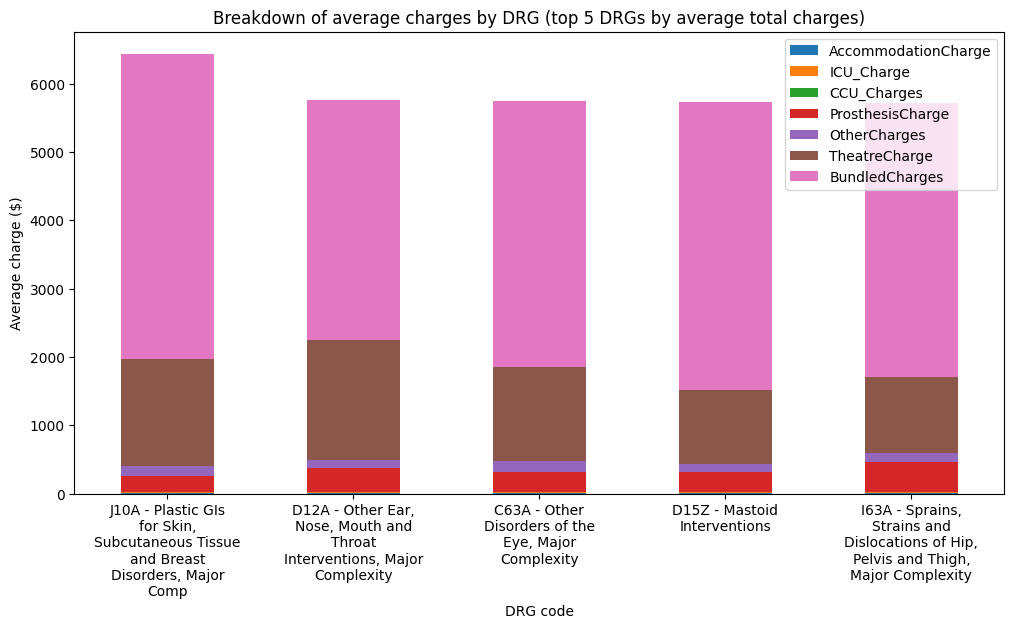

The top 5 DRGs (based on the descriptions) based on total average charges are:

1. **J10A** - Plastic Grafts for Skin, Subcutaneous Tissue, and Breast Disorders, Major Complexity
2. **D12A** - Other Ear, Nose, Mouth, and Throat Interventions, Major Complexity
3. **C63A** - Other Disorders of the Eye, Major Complexity
4. **D15Z** - Mastoid Interventions
5. **I63A** - Sprains, Strains, and Dislocations of Hip, Pelvis, and Thigh, Major Complexity

The total average charges for these DRGs range between $5000 to $7000, primarily driven by bundled payments, theatre charges, and prosthesis costs. This indicates that for more complex care involving bundled payment arrangements, surgical procedures and prosthetic interventions are the key cost drivers. The cost distribution is consistent across the top five DRGs, with bundled charges representing the largest portion (average 67.97% contribution across the top 5 DRGs), followed by theatre (23.41%) and prosthesis charges (5.49%), and then other associated costs (2.25%). The other remaining charges, accommodation (0.19%), ICU (0.17%) and CCU (0.14%) are negligible to the total average cost.

These results align with expectations, as it is reasonable to hypothesise that DRGs classified as high complexity typically require significant operating theatre time, prosthetic devices, and bundled services (which may include post-operative care, rehabilitation, and other ancillary services that can be assumed are not categorised under other charges).

Despite the dominance of bundled charges, theatre charges remain substantial, particularly in DRGs that involve surgical interventions such as plastic skin grafts (**J10A**), ENT procedures (**D12A**), eye disorders (**C63A**), mastoid surgeries (**D15Z**), and major sprains, strains, and dislocations (**I63A**). These DRGs often involve extended operating room times, followed by comprehensive post-operative care and rehabilitation, which likely accounts for the high bundled costs observed.

**Exploratory data analysis of DRGs**

Look at all the unique DRGs (`AR-DRG`) and see which DRGs are most prevalent within this dataset.

Number of unique DRGs: 804


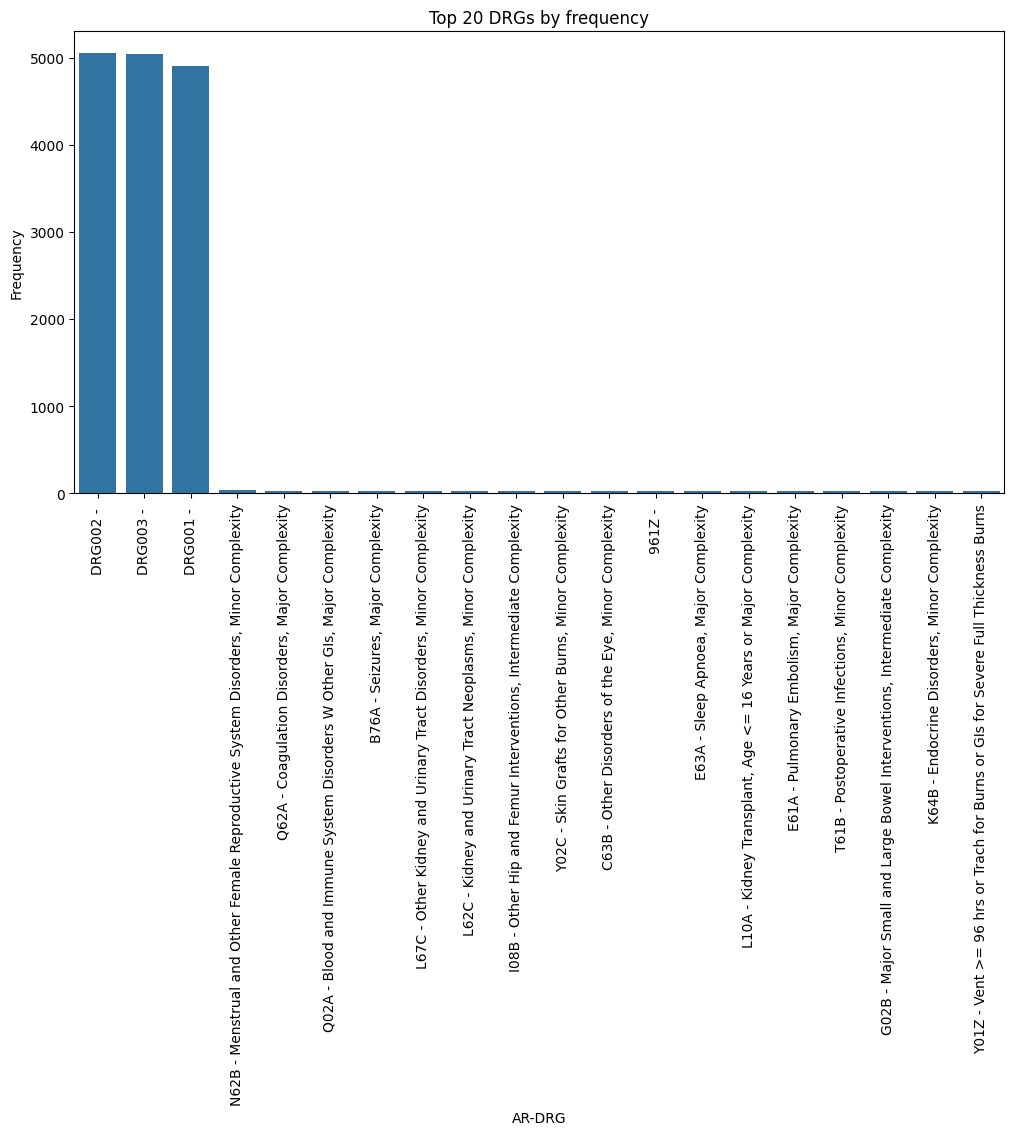

In [51]:
# get unique drgs
unique_drgs = data['DRGDescription'].nunique()
print('Number of unique DRGs: ' + str(unique_drgs))

# get frequencies
drg_frequencies = data['DRGDescription'].value_counts()
drg_frequencies_t20 = drg_frequencies.head(20)

# plot the top 20
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=drg_frequencies_t20.index, 
            y=drg_frequencies_t20.values)
plt.xticks(rotation=90)
plt.title('Top 20 DRGs by frequency')
plt.xlabel('AR-DRG')
plt.ylabel('Frequency')
plt.show()


**Interpretation**
* Looks like `DRG001`, `DRG002` and `DRG003` are most prevalent in the data, where they represent the large majority of the patient DRGs.
* These DRG codes (`DRG001`, `DRG002` and `DRG003`) are also generic codes and does not appear on the AIHW website. May potentially indicate a data issue or some custsom codes for when the classification is not covered by the standard DRG codes. `961Z` is also not covered and may be a new DRG code that isn't present in AR-DRG v10. 

**Exploratory data analysis of charges**

Charges worth looking at for this question:
* `AccommodationCharge`
* `ICU_Charge`
* `CCU_Charges`
* `ProsthesisCharge`
* `PharmacyCharge`
* `OtherCharge`
* `TheatreCharge`
* `BundledCharges`

In [52]:
# EDA of charges
charges = ['AccommodationCharge', 'ICU_Charge', 'CCU_Charges', 'ProsthesisCharge', 'PharmacyCharge', 'OtherCharges', 'TheatreCharge', 'BundledCharges']
print(data[charges].describe())

# why is PharmacyCharge not showing up?
print(data['PharmacyCharge'].dtype) # showing up as an object. There might be some strings in here.

# find non-floats in PharmcyCharge
data['PharmacyCharge_num'] = pd.to_numeric(data['PharmacyCharge'], errors='coerce') # any non-numbers will be turn to NaN
non_num_pharm = data[np.isnan(data['PharmacyCharge_num'])] # subset the data to just the errors/missing values
print(non_num_pharm['PharmacyCharge'].unique()) # get PharmacyCharge values where there's error/missing value- looks like there's 'ERROR' in there.

# count the number of rows affected
error_lines = data[data['PharmacyCharge']=='ERROR'] # 900 rows affected
print(len(error_lines))

# recode ERROR as NaN
data['PharmacyCharge'] = data['PharmacyCharge'].replace('ERROR', np.nan)

# coerce PharmacyCharge as Float
data['PharmacyCharge'] = pd.to_numeric(data['PharmacyCharge'], errors='coerce')

print(data[charges].describe())

# check if there any rows where BundledCharges is greater than ThreatreCharge
bundledlessthan = data[data['BundledCharges'] < data['TheatreCharge']]

print(f"Number of rows where BundledCharges are less than TheatreCharge: {bundledlessthan.shape[0]}") # There are 777 instances when the bundledcharges are less than 


       AccommodationCharge  ICU_Charge  CCU_Charges  ProsthesisCharge  \
count             30000.00    12862.00     12833.00          12849.00   
mean                 11.19        9.84         8.34            317.98   
std                   3.07        2.60         1.90            184.55   
min                   4.64        5.71         5.02             50.04   
25%                   8.80        7.70         6.81            181.95   
50%                  10.66        9.51         7.77            311.06   
75%                  13.32       11.59        10.20            437.70   
max                  33.94       29.96        17.56           5391.75   

       OtherCharges  TheatreCharge  BundledCharges  
count      12819.00       12836.00        12894.00  
mean         112.84        1090.96         2724.78  
std           54.12         518.08         1306.23  
min           20.00         200.08          500.05  
25%           65.96         640.54         1595.54  
50%          112.94     

**Initial thoughts**

* Assuming that each of these fields represents charges in dollars.
* `AccommodationCharge`, `ICU_Charge`, `CCU_Charges`, `ProsthesisCharge`, `ThreatreCharge` and `OtherCharge` - the range and standard deviation of these seem reasonable. The standard deviation of prosthesis and theatre are quite large but that might reflect the type of prosthetics and surgery service that was provided. 
* `PharmacyCharge` looks unusual - the summary statistics seem to indicate that there are some data quality issues.
  * Will exclude `PharmacyCharge` from this analysis given the likely data quality issues
* There are 777 rows where `BundledCharges` is less than `ThreatreCharge` (chosen because it represents the largest cost out of the others). Therefore, it is reasonable to assume that `BundledCharges` does not capture the other charges and each charge is mutually exclusion and collectively exhaustive of the entire patient episode. 
* Therefore, for the purpose of this analysis, we will use the constituent charges to assume the total cost (excluding `PharmacyCharge`). 
* Based on initial inspection, the total cost through summing the constituent charges will be heavily biased by DRGs that have bundled charges, prosthetic devices or use of an operating theatre given the mean is a lot higher compared to accommodation, ICU and CCU charges. 
 

**Assess which DRGs accrue the largest charges.**
* Calculate the average charge of each charge type for each DRG
* Visualise this using a stacked bar chart

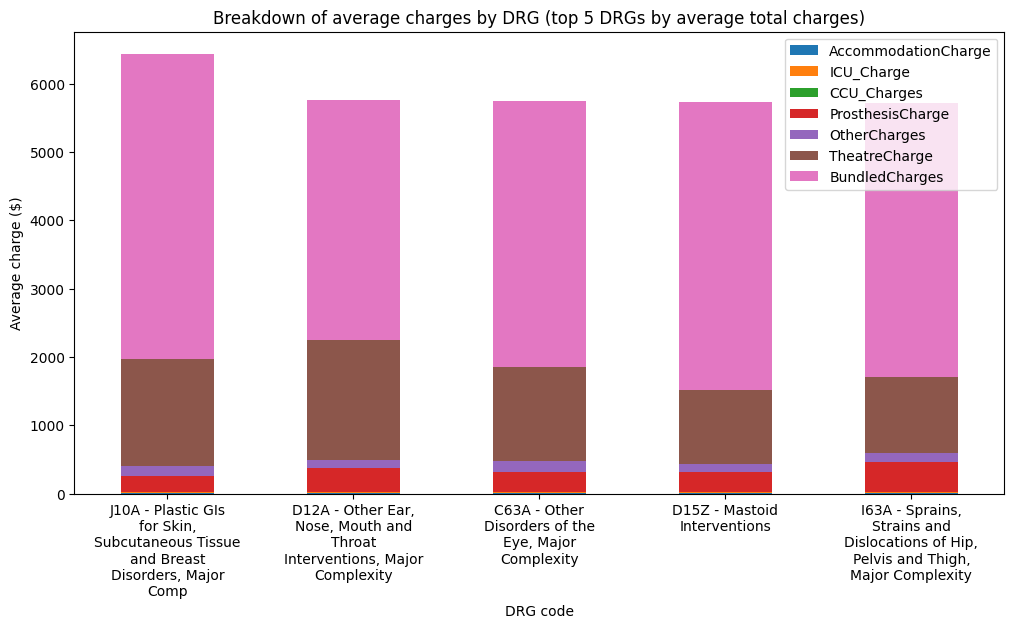

AccommodationCharge_Pct    0.19
ICU_Charge_Pct             0.17
CCU_Charges_Pct            0.14
ProsthesisCharge_Pct       5.49
OtherCharges_Pct           2.25
TheatreCharge_Pct         23.41
BundledCharges_Pct        67.97
dtype: float64


In [86]:
# Calculate the average charge of each charge type for each DRG

charges_included = charges = ['AccommodationCharge', 'ICU_Charge', 'CCU_Charges', 'ProsthesisCharge', 'OtherCharges', 'TheatreCharge', 'BundledCharges']

# get the average cost per DRG
drg_charge_breakdown = data.groupby('DRGDescription')[charges_included].mean() 

# sum the average charges for each drg
drg_charge_breakdown['AverageTotalCharge'] = drg_charge_breakdown.sum(axis=1)

# sort the DRG by total average charge
top_drg_charge_breakdown = drg_charge_breakdown.sort_values(by='AverageTotalCharge', ascending=False)

# drop the total col
top_drg_charge_breakdown = top_drg_charge_breakdown.drop('AverageTotalCharge', axis=1)

# Get the top 5 DRGs
top_drg_charge_breakdown = top_drg_charge_breakdown.head(5)
wrapped_drg_descriptions = top_drg_charge_breakdown.index.to_series().apply(lambda x: textwrap.fill(x, width=20))

# Visulise this
ax = top_drg_charge_breakdown.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Breakdown of average charges by DRG (top 5 DRGs by average total charges)')
plt.ylabel('Average charge ($)')
plt.xlabel('DRG code')
ax.set_xticklabels(wrapped_drg_descriptions, rotation=0, ha='center') # Update x-ticks to display wrapped labels
plt.legend(loc='upper right')
plt.show()

# calculate percentage contribution for each charge
for charge in charges_included:
    top_drg_charge_breakdown[charge + '_Pct'] = (top_drg_charge_breakdown[charge] / top_drg_charge_breakdown.sum(axis=1)) * 100

average_contribution = top_drg_charge_breakdown[[charge + '_Pct' for charge in charges_included]].mean()
print(average_contribution)



**Interpretation**

The top 5 DRGs (based on the descriptions) based on total average charges are:

1. **J10A** - Plastic Grafts for Skin, Subcutaneous Tissue, and Breast Disorders, Major Complexity
2. **D12A** - Other Ear, Nose, Mouth, and Throat Interventions, Major Complexity
3. **C63A** - Other Disorders of the Eye, Major Complexity
4. **D15Z** - Mastoid Interventions
5. **I63A** - Sprains, Strains, and Dislocations of Hip, Pelvis, and Thigh, Major Complexity

The total average charges for these DRGs range between $5000 to $7000, primarily driven by bundled payments, theatre charges, and prosthesis costs. This indicates that for more complex care involving bundled payment arrangements, surgical procedures and prosthetic interventions are the key cost drivers. The cost distribution is consistent across the top five DRGs, with bundled charges representing the largest portion (average 67.97% contribution across the top 5 DRGs), followed by theatre (23.41%) and prosthesis charges (5.49%), and then other associated costs (2.25%). The other remaining charges, accommodation (0.19%), ICU (0.17%) and CCU (0.14%) are negligible to the total average cost.

These results align with expectations, as it is reasonable to hypothesise that DRGs classified as high complexity typically require significant operating theatre time, prosthetic devices, and bundled services (which may include post-operative care, rehabilitation, and other ancillary services that can be assumed are not categorised under other charges).

Despite the dominance of bundled charges, theatre charges remain substantial, particularly in DRGs that involve surgical interventions such as plastic skin grafts (**J10A**), ENT procedures (**D12A**), eye disorders (**C63A**), mastoid surgeries (**D15Z**), and major sprains, strains, and dislocations (**I63A**). These DRGs often involve extended operating room times, followed by comprehensive post-operative care and rehabilitation, which likely accounts for the high bundled costs observed.

## Part 3: SQL analysis

### Question 4

> Write an SQL query to calculate the total and average admissions for each month over the last two years. Include the month and year in the results.

*Response*:

The query below returns:
* The total admissions for each month (`total_admission`) and the average number of admissions across all months (`average_monthly_admission`) for each month and year over the last two years.

In [87]:
query = """
SELECT 
    strftime('%Y', AdmissionDate) AS admission_year,
    strftime('%m', AdmissionDate) AS admission_month,
    COUNT(*) AS total_admissions,
    AVG(COUNT(*)) OVER() AS average_monthly_admission
FROM
    data
GROUP BY 
    admission_year, admission_month;
"""

output = psql.sqldf(query=query)

print(output)


   admission_year admission_month  total_admissions  average_monthly_admission
0            2022              08              1215                    1250.00
1            2022              09              1236                    1250.00
2            2022              10              1238                    1250.00
3            2022              11              1245                    1250.00
4            2022              12              1244                    1250.00
5            2023              01              1252                    1250.00
6            2023              02              1166                    1250.00
7            2023              03              1259                    1250.00
8            2023              04              1252                    1250.00
9            2023              05              1272                    1250.00
10           2023              06              1267                    1250.00
11           2023              07              1287 

### Question 5 

> Write an SQL query to analyse the distribution of `TotalCharges` by `PrincipalDiagnosis` and `Sex`. Use percentiles to describe the distribution.

#### Response

Based on the dataset and the observed output below, grouping by `PrincipalDiagnosis` and `Sex` to analyse the distribution of `TotalCharges` using percentiles shows that the overall data is sparse. Specifically, there are 22,840 rows in the output, but over 17,824 unique `PrincipalDiagnosis` codes, which suggests that the combinations of `PrincipalDiagnosis` and `Sex` are too granular to provide meaningful insights or percentile ranking (i.e. most of the percentile will show up as 1 given there's only one single observation as shown in the `n_diagnoses` column of the output).

Given this issue and the nature of how `PrincipalDiagnosis` codes are structured, it would be more effective to aggregate these codes into broader and more meaningful groups. For example, grouping similar diagnoses based on disease categories, body systems or potential treatment types to help address the issue of small sizes within each group. In the ICD-10-CM coding system, the highest level listing or classification would be to aggregate the codes by the 22 Chapters which is based on the body system or condition (e.g. diagnoses related to Neoplasms (C00-D49), Diseases of the Respiratory System (J00-J99)). This higher-level grouping would provide sufficient data to assess the variability in `TotalCharges` across broader diagnostic categories.

In [88]:
query = """

WITH TOTAL_TABLE AS (
    SELECT
        PrincipalDiagnosis,
        Sex,
        COUNT(*) AS n_diagnoses,
        SUM(
            COALESCE(AccommodationCharge, 0) + 
            COALESCE(CCU_Charges, 0) + 
            COALESCE(ICU_Charge, 0) + 
            COALESCE(TheatreCharge, 0) + 
            COALESCE(ProsthesisCharge, 0) + 
            COALESCE(OtherCharges, 0) + 
            COALESCE(BundledCharges, 0)
        ) AS TotalCharges
    FROM 
        data
    WHERE 
        AdmissionDate BETWEEN '2022-08-01' AND '2024-07-31' 
    GROUP BY
        PrincipalDiagnosis, Sex
)

SELECT 
    PrincipalDiagnosis,
    Sex,
    TotalCharges,
    n_diagnoses,
    NTILE(100) OVER (PARTITION BY PrincipalDiagnosis, Sex ORDER BY TotalCharges) AS Percentile
FROM TOTAL_TABLE
ORDER BY TotalCharges / n_diagnoses DESC;
"""

output = psql.sqldf(query=query)

print(output)

      PrincipalDiagnosis Sex  TotalCharges  n_diagnoses  Percentile
0                  H72.7   M       8415.46            1           1
1                  K22.1   F       7461.09            1           1
2                  Q24.8   M       7369.72            1           1
3                  P43.7   F       7332.08            1           1
4                  H14.5   M       7272.09            1           1
...                  ...  ..           ...          ...         ...
22835              B46.3   F          5.77            1           1
22836              N65.2   M          5.45            1           1
22837              W46.9   M          5.15            1           1
22838              W30.4   M          4.80            1           1
22839              A28.8   F          4.75            1           1

[22840 rows x 5 columns]


## Part 4: Strategic Insights and Recommendations

### Question 6

> Based on your analysis, identify two strategic insights that could help Ramsay improve hospital operations or patient care. Justify your insights with evidence from your data analysis.

#### Response

**Hospital operations**

Given that bundled charges contribute an average of 67.97% to the total costs across the top 5 DRGs, it is apparent that bundled payments are the dominant cost driver for these complex care episodes. The fact that bundled charges contribute over two-thirds of total average costs across these DRGs:
 
1. **J10A** - Plastic Grafts for Skin, Subcutaneous Tissue, and Breast Disorders, Major Complexity
2. **D12A** - Other Ear, Nose, Mouth, and Throat Interventions, Major Complexity
3. **C63A** - Other Disorders of the Eye, Major Complexity
4. **D15Z** - Mastoid Interventions
5. **I63A** - Sprains, Strains, and Dislocations of Hip, Pelvis, and Thigh, Major Complexity

suggest that they include a significant portion of the treatment costs associated with the complex nature of these DRGs, including pre-operative services, post-operative care and rehabilitation. As there is currently a lack of transparency within the data, it would be beneficial for Ramsay to further gather data-driven insights into what is driving the bundled charges to potentially identify areas of cost savings while maintaining the quality of care. For example, it is currently unclear whether rehabilitation services, follow-up consultations or post-surgical complications contribute significantly to the bundled cost for DRGs like I63A (Sprains, Strains, and Dislocations). It is likely that there is a general bundling framework in place that applies a one-size-fits-all approach to covering a wide range of essential services. This presents an opportunity to enhance transparency by identifying the specific aspects of care that are driving the highest cost. By enhancing visibility into these cost drivers, it would enable Ramsay to develop targeted strategies aimed at improving both financial performance and patient health outcomes. Specifically, personalising the bundled payment model to reflect the unique needs of different patient groups or procedures could result in more efficient resource allocation and better overall care.


**Patient care**

Given the granularity of the `PrincipalDiagnosis` codes, it would be beneficial for Ramsay to aggregate these codes into broader diagnostic categories, such as the 22 ICD-10 Chapters, while still utilising the granular codes to enhance patient care. When exploring strategic opportunities to improve patient outcomes, such as developing personalised care pathways, Ramsay could create standardised care protocols for specific diagnostic groups based on higher-order groupings like the 22 ICD-10 Chapters or intermediate levels of aggregation, particularly for diagnostic groups that are either prevalent or complex. For example, in the case of neoplastic diseases (Chapter 2 - Neoplasms (C00-D49)), a standardised care pathway could enable a multi-disciplinary delivery of care approach, covering oncologists, radiologists and other provider specialities to support the patient through the care episode. Similarly, using broader diagnostic groups could also help identify potential patients at risk for particular diseases. For instance, when focusing on patients related to the circulatory system (Chapter 9 -  Diseases of the Circulatory System (I00-I99)), Ramsay could leverage this aggregated diagnostic categories data to design preventative programs aimed at early detection, such as including lifestyle intervention, preventative care and strategies to reduce the need for acute interventions, ultimately improving patient outcomes.

## Part 5: Model Development

### Question 7

> Describe a predictive model that could help Ramsay act upon one of the insights you found in Part 4. Describe your model purpose, model choice, preprocessing steps, and evaluation metrics.

#### Response

**Hospital operations - drivers of bundled charges**

* **Model purpose**: Identify the key factors driving bundled charges within the dataset, particularly across complex DRGs
* **Model choice**:  For this model purpose, a GLM can be used as it carries the key benefit of interpretability, making it easier to quantify and understand the relationship between bundled charges and the predictors in the model.
* **Model design**:
  * Response variable: `BundledCharges`
  * Predictor variables:
    * Patient demographics including `Age`, `Gender`, `Sex`, `length of stay` (see Q2)
    * Episode information, including `AR-DRG`, `UrgencyofAdmission` and `procedure complexity` from `DRGDescription` (see Q1)
    * Charges, including `AccommdationCharge`, `ICU_Charge`, `CCU_Charges`, `TheatreCharge`, `ProsthesisCharge` and `OtherCharges`.  

* **Pre-processing steps**
  * Handle missing data and outliers. - see Q1. 
  * Encode categorical variables - for example, one-hot encode `Gender`, `Urgency of Admission`, `AR-DRG` - while there are more than 800 DRGs in the data. It would be ideal to narrow down the DRGs to a subset that has high complexity as that would be more relevant to predict `BundledCharges`.
  * Standardise numerical features - for example, could min-max scale the predictor charges to ensure the features are on a comparable scale.
  * Assess distributions and apply transformation where needed - for example, apply log transformation to ThreatreCharge 
  * Feature engineering - create interaction terms between key variables. For example, it may be worthwhile to create an interaction term between `ThreatreCharge` and `ProsthesisCharge` given they are most likely jointly impacted in complex procedures.
  * Train test split the data - use 70% for training and hold out 15% for testing and another 15% for validation. 
  * Assess the quality of the features - for example, check for multicollinearity between the predictor variables. For example, if certain charges like `AccommdationCharge` and `ICU_Charge` are highly collinear, it might be worth combining them into a single feature.

* **Model evaluation**: Evaluate the performance of the GLM by assessing how well the model's predictions match against the actual `BundledCharges`. This could be done using:
  * Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) to get prediction errors
  * R-squared (R2) to explain how much variability in the data is captured by the model
  * Akaike Information Criteria (AIC) to compare between models and assess goodness of it while balancing with model complexity.


## Part 6: MLOps and Deployment

### Question 8

> Describe how you would deploy the trained model into a production environment. Discuss how you would monitor its performance and handle any potential issues.


#### Response

At a high level, the following strategies will help ensure that the deployed model will perform consistently, handle issues proactively and adapt to real-time production challenges.

* **Model drift**
  * Over time, the trained model may experience drift, where the data distribution in production diverges from the data used during model training. This is particularly common as new data is continuously collected. Model drift can also lead to unintended biases, such as imbalances in data that may introduce bias against certain groups.
  * To mitigate the risk of drift, the model should be regularly retrained with new incoming data to ensure it remains up-to-date with emerging trends and patterns.
  * Continuous monitoring of this risk can be achieved using evaluation metrics such as MAE, RMSE and R2 in production. These metrics can track any significant deviation from an established baseline. For instance, a monitoring dashboard could be developed with automated alerts that trigger when potential drift is detected, such as when the MAE exceeds a certain percentage increase over the baseline.

* **Data quality monitoring**
  * Changes in the quality of incoming data can negatively affect model performance, causing issues such as missing values, inconsistent formats, or the presence of outliers that were not accounted for in the training data.
  * To address these risks, automated data quality checks can be implemented. These may include imputing missing values, setting up alerts for unexpected values (e.g., flagging cases where length of stay is negative), and ensuring that the format and structure of incoming data remain consistent with the training data.
  * Similar to the above, a data quality monitoring dashboard could be used to quickly report and handle any data anomalies, ensuring that issues are addressed promptly and the integrity of the data is maintained.

* **Scalability and latency**
  * Deploying and scoring the model in production, particularly in real-time, can lead to performance bottlenecks, potentially increasing operational costs.
  * To prevent these challenges, load testing should be conducted to ensure that the model can scale efficiently with increasing volume of data. If performance bottlenecks occur, improvements could include model pruning (reducing feature complexity) or optimising hardware by leveraging GPU or TPU acceleration, commonly available through cloud providers. These hardware accelerations can significantly improve throughput and reduce latency, ensuring that the model meets real-time performance demands if required.

